In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

In [2]:
%store -r data
data.shape

(412537, 15)

In [3]:
def mEmptyGraph(d,str):
    d_1 = {'': [d, 100-d]}
    d_2 = pd.DataFrame(data=d_1)
    d_2.index = ['Cellules pleines', 'Full Cell'] 
    plot = d_2.plot.pie(subplots=True, figsize=(6,6), fontsize=9)
    plt.title(str, fontsize=15)
    return plot   


In [4]:
#Fonction Utile #1
def mEmptyCell(data):
    all_empty_cell = round((sum(data.isnull().sum()))*100/(len(data)*len(data.columns)))
    return all_empty_cell 

In [5]:
data.info()

#d_03 = data[["product_name",'nutrition-score-fr_100g',"saturated-fat_100g","fat_100g","sugars_100g", "energy_100g","sodium_100g",'nutriscore_grade'].copy()]
d_03 = data.rename(columns={
    'code': 'Code' ,              
'product_name': 'Nom_du_produit'     ,  
'brands':    'Marque'   ,        
'categories_en':   'Categories'    ,   
'labels':   'Label'       ,  
'energy-kcal_100g':'Calorie_Kcal' ,
'energy_100g':  'Energie_J' ,
'fat_100g':     'Graisses' ,
'saturated-fat_100g':'Graisses_saturés' ,
'carbohydrates_100g':'Glucides' ,
'sugars_100g': 'Sucres'   ,
'proteins_100g': 'Proteines' ,
'salt_100g' :     'Sel'  ,
'sodium_100g':       'Sodium' ,
'nutrition-score-fr_100g' : 'Score',
'fiber_100g' : 'Fibres'
})
d_03.head(1)

#Carbohydrates = sucres
#sodium = salt

#d_7.drop(d_7.columns[-1],axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 412537 entries, 0 to Total
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   code                     412537 non-null  object
 1   product_name             411350 non-null  object
 2   brands                   305391 non-null  object
 3   categories_en            252720 non-null  object
 4   energy-kcal_100g         375772 non-null  object
 5   energy_100g              412440 non-null  object
 6   fat_100g                 410143 non-null  object
 7   saturated-fat_100g       412102 non-null  object
 8   carbohydrates_100g       410055 non-null  object
 9   sugars_100g              412139 non-null  object
 10  proteins_100g            412379 non-null  object
 11  salt_100g                409485 non-null  object
 12  sodium_100g              409485 non-null  object
 13  nutrition-score-fr_100g  235876 non-null  object
 14  fiber_100g               1

,Code,Nom_du_produit,Marque,Categories,Calorie_Kcal,Energie_J,Graisses,Graisses_saturés,Glucides,Sucres,Proteines,Sel,Sodium,Score,Fibres
0,0000000000017,Vitória crackers,NaN,NaN,375,1569,7,3.08,70.1,15,7.8,1.4,0.56,NaN,NaN


In [6]:
d_03.shape

(412537, 15)

//////////////////////
Cellules pleines  13 %
//////////////////////


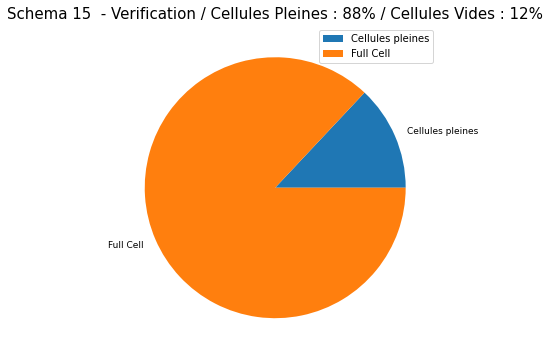

In [7]:
mEmptyCell_data = mEmptyCell(d_03)
print("//////////////////////")
print('Cellules pleines ', mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Cellules pleines'
str = "Schema 15  - Verification / Cellules Pleines : 88% / Cellules Vides : 12%"
a = mEmptyGraph(mEmptyCell_data,str)


In [8]:

d_04 = d_03.dropna()
d_04.head(10)

,Code,Nom_du_produit,Marque,Categories,Calorie_Kcal,Energie_J,Graisses,Graisses_saturés,Glucides,Sucres,Proteines,Sel,Sodium,Score,Fibres
21,0000000001281,Tarte noix de coco,"Crous Resto',Crous","Pies,Sweet pies,Coconut pies",381,1594,22,15.5,27.3,21.9,4.6,0.1,0.04,14,4.4
31,0000000001885,Compote de poire,Crous,"Plant-based foods and beverages,Plant-based fo...",157,657,0,0,36,27,0.6,0,0,-2,3.6
66,0000000005470,BAguette bressan,Crousresto',"Plant-based foods and beverages,Plant-based fo...",160,669,2.2,0.5,25.2,0.6,9.5,0.358,0.1432,-4,1.6
384,0000005016,Pesto à La Roquette Bio Kazidomi,Kazidomi,"Groceries,Sauces,Pestos",561,2318,53.2,9.6,11.7,0.5,8.2,2.7,1.08,23,1.3
385,0000005018,Crème d'Artichaut Bio Kazidomi,Kazidomi,"Spreads,Salted spreads,Artichoke spreads",268,1104,27.4,3.9,1.8,0,1.9,2.7,1.08,11,3.5
394,0000007020254,Root Beer,A&W,"Beverages,Carbonated drinks,Sodas,Sweetened be...",51,213,0,0,14,0,0,1,0.4,12,0
440,0000010206515,Pâte à Sucre,Alice Délice,"Snacks,Sweet snacks,Confectioneries,Cooking he...",411,1720,6.42,3.53,87.86,81.67,0.03,0.1,0.04,18,0
558,0000030053014,Pastille Vichy,Vichy,"Snacks,Sweet snacks,Confectioneries,Candies,fr...",250,1046,0,0,95,0,0,0,0,3,0
577,0000040144078,M&M's Peanut Butter,"M&M's,Mars,Mars Chocolat","Snacks,Sweet snacks,Confectioneries,Chocolate ...",563,2360,30.5,18.8,51.6,51.6,0,2.23,0.892,36,0
598,0000050457540,Heinz Burger Sauce 220Ml,Heinz,"Groceries,Sauces,Burger sauces",408,1707,37,4,17,12,1.7,2.2,0.88,19,0.2


In [9]:
print((d_04.filter(['Score'], axis=1)).astype(int).describe())
print("==================================================")
print((d_04.filter(['Graisses_saturés'], axis=1)).astype(int).describe())
print("==================================================")
print((d_04.filter(['Graisses'], axis=1)).astype(int).describe())
print("==================================================")
print((d_04.filter(['Sucres'], axis=1)).astype(int).describe())
print("==================================================")
print((d_04.filter(['Energie_J'], axis=1)).astype(int).describe())
print("==================================================")
print((d_04.filter(['Glucides'], axis=1)).astype(int).describe())
print("==================================================")
print((d_04.filter(['Calorie_Kcal'], axis=1)).astype(int).describe())
print("==================================================")
print((d_04.filter(['Sel'], axis=1)).astype(int).describe())
print("==================================================")
print((d_04.filter(['Proteines'], axis=1)).astype(int).describe())
print("==================================================")
print((d_04.filter(['Fibres'], axis=1)).astype(int).describe())
print("==================================================")

              Score
count  74054.000000
mean       7.216207
std        8.819116
min      -15.000000
25%        0.000000
50%        6.000000
75%       14.000000
max       40.000000
       Graisses_saturés
count      74054.000000
mean           4.429632
std            8.071498
min            0.000000
25%            0.000000
50%            1.000000
75%            6.000000
max          120.000000
           Graisses
count  74054.000000
mean      13.096484
std       17.958305
min        0.000000
25%        0.000000
50%        6.000000
75%       20.000000
max      100.000000
             Sucres
count  74054.000000
mean      12.868515
std       18.106210
min        0.000000
25%        1.000000
50%        4.000000
75%       19.000000
max      100.000000
          Energie_J
count  74054.000000
mean    1157.626637
std      880.121065
min        0.000000
25%      423.000000
50%     1084.000000
75%     1715.000000
max    86200.000000
           Glucides
count  74054.000000
mean      29.853755
std 

# 1 -----SCORE 1

,Score
count,74054.000000
mean,7.216214
std,8.819110
min,-15.000000
25%,0.000000
50%,6.000000
75%,14.000000
max,40.000000


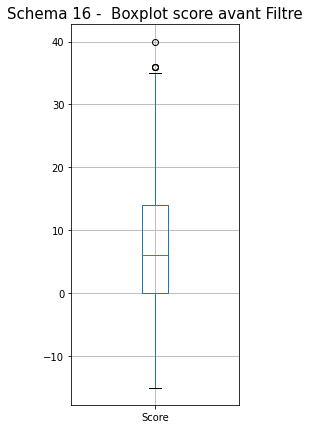

In [10]:
d_04_Score = d_04.filter(['Score'], axis=1)
d_04_Score['Score'] = pd.to_numeric(d_04_Score['Score'])

#boxplot Avant
plt.figure(figsize=(3, 7))
boxplot_Score = d_04_Score.boxplot(column=['Score'])
plt.title('Schema 16 -  Boxplot score avant Filtre', fontsize=15)
d_04_Score.describe()

//////////////////////
Cellules pleines :  Score 0 %
//////////////////////


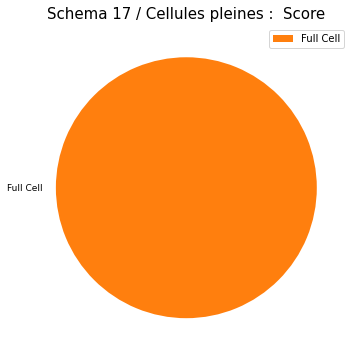

In [11]:
mEmptyCell_data = mEmptyCell(d_04_Score)
print("//////////////////////")
print('Cellules pleines :  Score', mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 17 / Cellules pleines :  Score'


a = mEmptyGraph(mEmptyCell_data,str)

In [12]:
#-----SCORE 1 : Drop NA -------
d_041_score = d_04_Score.dropna()
print("Score 2----", d_041_score.describe())
#-----SCORE 2 : Filtre 25 / 75 -------
print("Score 3----", d_041_score.shape)
d_042_score_filter = d_041_score.drop(d_041_score[d_041_score.Score < 0].index)
d_043_score_filter = d_042_score_filter.drop(d_041_score[d_041_score.Score > 14].index)
d_score_filter = d_043_score_filter.sort_values(by=['Score'], ascending=False)


Score 2----               Score
count  74054.000000
mean       7.216214
std        8.819110
min      -15.000000
25%        0.000000
50%        6.000000
75%       14.000000
max       40.000000
Score 3---- (74054, 1)


,Score
count,74054.000000
mean,7.216214
std,8.819110
min,-15.000000
25%,0.000000
50%,6.000000
75%,14.000000
max,40.000000


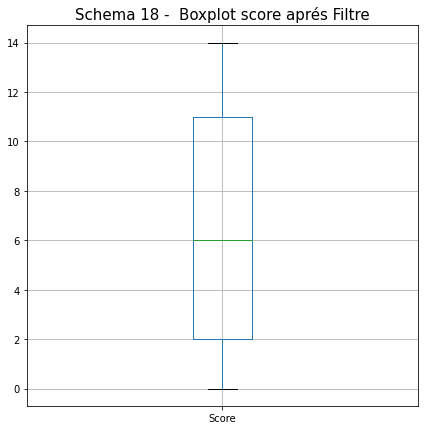

In [13]:
#boxplot Aprés
plt.figure(figsize=(7, 7))
boxplot_Score = d_score_filter.boxplot(column=['Score'])
plt.title('Schema 18 -  Boxplot score aprés Filtre', fontsize=15)
d_04_Score.describe()

In [14]:


############################ GRAPH 1 ############################


#plt.figure(figsize=(7, 7))
#sns.set(font_scale=1)
#res = sns.lineplot(x=d_score_filter.index, y='Score', data=d_score_filter) 
#res.set(xlim=(0,1),xticks=[0,78360],yticks=[]) 
#plt.xticks(rotation=65)
#plt.title("Score", fontsize=15)


In [15]:
# ----------------------- A faire Tourner
#sns.set_theme(style="whitegrid")
#ax = sns.barplot(x=d_score_filter.index, y="Score", data=d_score_filter)

# 2 -----sat_fat 

In [16]:
d_04

,Code,Nom_du_produit,Marque,Categories,Calorie_Kcal,Energie_J,Graisses,Graisses_saturés,Glucides,Sucres,Proteines,Sel,Sodium,Score,Fibres
21,0000000001281,Tarte noix de coco,"Crous Resto',Crous","Pies,Sweet pies,Coconut pies",381,1594,22,15.5,27.3,21.9,4.6,0.1,0.04,14,4.4
31,0000000001885,Compote de poire,Crous,"Plant-based foods and beverages,Plant-based fo...",157,657,0,0,36,27,0.6,0,0,-2,3.6
66,0000000005470,BAguette bressan,Crousresto',"Plant-based foods and beverages,Plant-based fo...",160,669,2.2,0.5,25.2,0.6,9.5,0.358,0.1432,-4,1.6
384,0000005016,Pesto à La Roquette Bio Kazidomi,Kazidomi,"Groceries,Sauces,Pestos",561,2318,53.2,9.6,11.7,0.5,8.2,2.7,1.08,23,1.3
385,0000005018,Crème d'Artichaut Bio Kazidomi,Kazidomi,"Spreads,Salted spreads,Artichoke spreads",268,1104,27.4,3.9,1.8,0,1.9,2.7,1.08,11,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555145,990530101017343401,Barre bio,Good Gout,"Plant-based foods and beverages,Plant-based fo...",509,2130,32.1,2.8,37.8,29.2,14,0.1,0.04,9,6.4
1555172,990530101029435828,Bio cookies,Griesson,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit...",477,1996,20,8.4,66,33,6.6,0.6,0.24,19,3.3
1555265,9938809161503,"Jus de fruit Innocent pomme ,peche et poire",Innocent,fr:jus-de-pomme-poire,45,188,0.1,0.1,9.9,9.3,0.4,0.01,0.004,1,1.2
1555307,9950014911001,Oignons jaunes 40/60,Ferme De L'artois,"Plant-based foods and beverages,Plant-based fo...",0,0,5,5,2,0.5,32,0.2,0.08,-11,25


In [17]:
d_04_SatFat = d_04.filter(['Graisses_saturés'], axis=1)
d_04_SatFat['Graisses_saturés'] = pd.to_numeric(d_04_SatFat['Graisses_saturés'])




,Graisses_saturés
count,74054.000000
mean,4.716282
std,8.043385
min,0.000000
25%,0.200000
50%,1.500000
75%,6.000000
max,120.000000


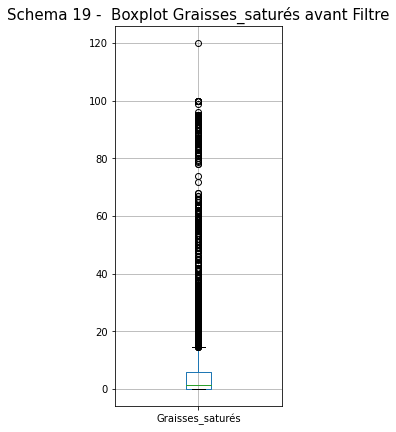

In [18]:

#boxplot Avant
plt.figure(figsize=(3, 7))
boxplot_SatFat = d_04_SatFat.boxplot(column=['Graisses_saturés'])
plt.title('Schema 19 -  Boxplot Graisses_saturés avant Filtre', fontsize=15)
d_04_SatFat.describe()

//////////////////////
Cellules pleines : Graisses_saturés 0 %
//////////////////////


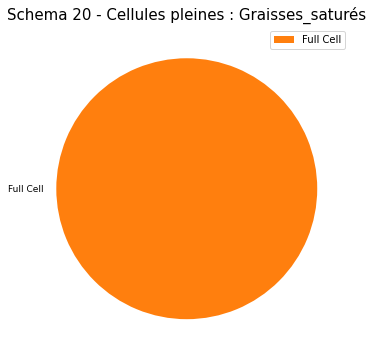

In [19]:
mEmptyCell_data = mEmptyCell(d_04_SatFat)
print("//////////////////////")
print('Cellules pleines : Graisses_saturés', mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 20 - Cellules pleines : Graisses_saturés'
a = mEmptyGraph(mEmptyCell_data,str)

In [20]:
#-----sat_fat 1 : Drop NA -------
d_041_sat_fat = d_04_SatFat.dropna()
print("sat_fat 2----", d_041_sat_fat.describe())
#-----Sat_fat 2 : Filtre 25 / 75 -------
print(d_041_sat_fat)
print("sat_fat 3----", d_041_sat_fat.shape)
d_042_sat_fat_filter = d_041_sat_fat.drop(d_041_sat_fat[d_041_sat_fat.Graisses_saturés < 0].index)
d_043_sat_fat_filter = d_042_sat_fat_filter.drop(d_041_sat_fat[d_041_sat_fat.Graisses_saturés >  6].index)
d_Sat_fat_filter = d_043_sat_fat_filter.sort_values(by=['Graisses_saturés'], ascending=False)
print(" sat_fat 4----", d_Sat_fat_filter.shape)



sat_fat 2----        Graisses_saturés
count      74054.000000
mean           4.716282
std            8.043385
min            0.000000
25%            0.200000
50%            1.500000
75%            6.000000
max          120.000000
         Graisses_saturés
21              15.500000
31               0.000000
66               0.500000
384              9.600000
385              3.900000
...                   ...
1555145          2.800000
1555172          8.400000
1555265          0.100000
1555307          5.000000
Total            0.173235

[74054 rows x 1 columns]
sat_fat 3---- (74054, 1)
 sat_fat 4---- (55814, 1)


,Graisses_saturés
count,74054.000000
mean,4.716282
std,8.043385
min,0.000000
25%,0.200000
50%,1.500000
75%,6.000000
max,120.000000


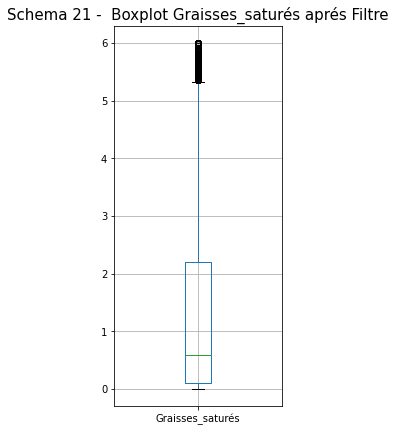

In [21]:
#boxplot Aprés
plt.figure(figsize=(3, 7))
boxplot_SatFat = d_Sat_fat_filter.boxplot(column=['Graisses_saturés'])
plt.title('Schema 21 -  Boxplot Graisses_saturés aprés Filtre', fontsize=15)
d_04_SatFat.describe()

In [22]:
# ----------------------- A faire Tourner
#sns.set_theme(style="whitegrid")
#ax = sns.barplot(x=d_Sat_fat_filter.index, y="SatFat", data=d_Sat_fat_filter)

# 3 -----Fat 

,Graisses
count,74054.000000
mean,13.358031
std,17.898355
min,0.000000
25%,0.900000
50%,6.300000
75%,20.000000
max,100.000000


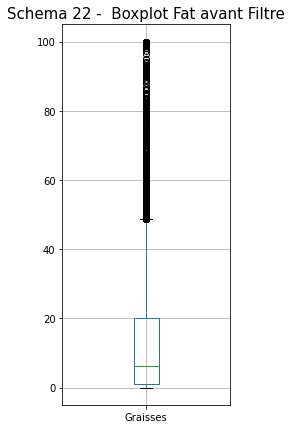

In [23]:
d_04_fat = d_04.filter(['Graisses'], axis=1)
d_04_fat['Graisses'] = pd.to_numeric(d_04_fat['Graisses'])
#BoxPlot Avant
plt.figure(figsize=(3, 7))

boxplot_Fat = d_04_fat.boxplot(column=['Graisses'])
plt.title('Schema 22 -  Boxplot Fat avant Filtre', fontsize=15)
d_04_fat.describe()

//////////////////////
Cellules pleines :  Graisses 0 %
//////////////////////


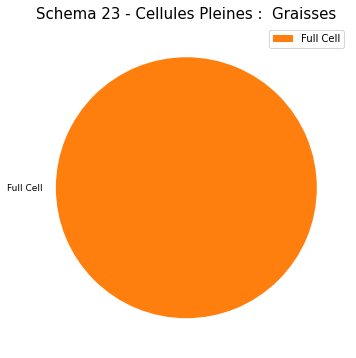

In [24]:
mEmptyCell_data = mEmptyCell(d_04_fat)
print("//////////////////////")
print('Cellules pleines :  Graisses', mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 23 - Cellules Pleines :  Graisses'
a = mEmptyGraph(mEmptyCell_data,str)

In [25]:
#-----_fat 1 : Drop NA -------
d_041_fat = d_04_fat.dropna()
print("_fat 2----", d_041_fat.describe())
#-----_fat 2 : Filtre 25 / 75 -------
print("_fat 3----", d_041_fat.shape)
d_042_fat_filter = d_041_fat.drop(d_041_fat[d_041_fat.Graisses < 0.9].index)
d_043_fat_filter = d_042_fat_filter.drop(d_041_fat[d_041_fat.Graisses >  2].index)
d_Fat_filter = d_043_fat_filter.sort_values(by=['Graisses'], ascending=False)
print(" _fat 4----", d_Fat_filter.shape)


_fat 2----            Graisses
count  74054.000000
mean      13.358031
std       17.898355
min        0.000000
25%        0.900000
50%        6.300000
75%       20.000000
max      100.000000
_fat 3---- (74054, 1)
 _fat 4---- (7007, 1)


,Graisses
21,22.000000
31,0.000000
66,2.200000
384,53.200000
385,27.400000
...,...
1555145,32.100000
1555172,20.000000
1555265,0.100000
1555307,5.000000


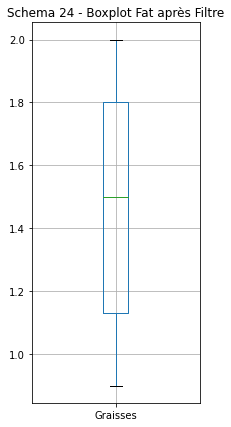

In [26]:
#boxplot Aprés
plt.figure(figsize=(3, 7))
boxplot_Fat = d_Fat_filter.boxplot(column=['Graisses'])
plt.title('Schema 24 - Boxplot Fat après Filtre')
d_04_fat

In [27]:
# ----------------------- A faire Tourner
#sns.set_theme(style="whitegrid")
#ax = sns.barplot(x=d_Fat_filter.index, y="Fat", data=d_Fat_filter)

# 4 ----- _sug

Text(0.5, 1.0, 'Schema 25 - Boxplot Sucres avant Filtre')

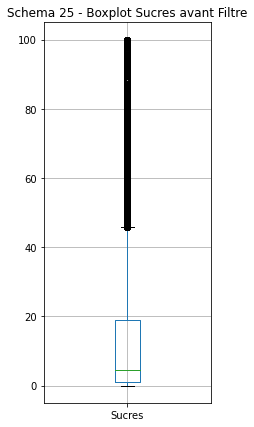

In [28]:
d_04_sug = d_04.filter(['Sucres'], axis=1)
d_04_sug['Sucres'] = pd.to_numeric(d_04_sug['Sucres'])
#BoxPlot Avant
plt.figure(figsize=(3, 7))

boxplot_Sugar = d_04_sug.boxplot(column=['Sucres'])
plt.title('Schema 25 - Boxplot Sucres avant Filtre')

//////////////////////
Cellules pleines :  Sucres 0 %
//////////////////////


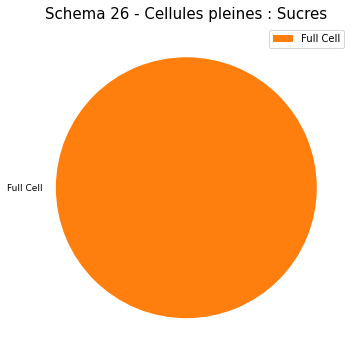

In [29]:
mEmptyCell_data = mEmptyCell(d_04_sug)
print("//////////////////////")
print('Cellules pleines :  Sucres', mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 26 - Cellules pleines : Sucres'

a = mEmptyGraph(mEmptyCell_data,str)

In [30]:
#-----_sug 1 : Drop NA -------
d_041_sug = d_04_sug.dropna()
print("_sug 2----", d_041_sug.describe())
#-----_sug 2 : Filtre 25 / 75 -------
print("_sug 3----", d_041_sug.shape)
d_042_sug_filter = d_041_sug.drop(d_041_sug[d_041_sug.Sucres < 1.1].index)
d_043_sug_filter = d_042_sug_filter.drop(d_041_sug[d_041_sug.Sucres >  19].index)
d_Sugar_filter = d_043_sug_filter.sort_values(by=['Sucres'], ascending=False)
print(" _sug 4----", d_Sugar_filter.shape)


_sug 2----              Sucres
count  74054.000000
mean      13.167977
std       18.032106
min        0.000000
25%        1.100000
50%        4.400000
75%       19.000000
max      100.000000
_sug 3---- (74054, 1)
 _sug 4---- (37748, 1)


Text(0.5, 1.0, 'Schema 27 - Boxplot Sucres après Filtre')

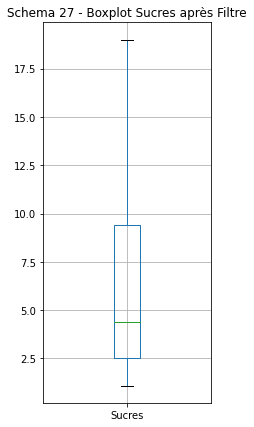

In [31]:
#BoxPlot Aprés
plt.figure(figsize=(3, 7))
boxplot_Sugar = d_Sugar_filter.boxplot(column=['Sucres'])
plt.title('Schema 27 - Boxplot Sucres après Filtre')

In [32]:
# ----------------------- A faire Tourner
#sns.set_theme(style="whitegrid")
#ax = sns.barplot(x=d_Sugar_filter.index, y="Sugar", data=d_Sugar_filter)

# 5 ----- _Energy

Text(0.5, 1.0, 'Schema 28 - Boxplot Energy avant Filtre')

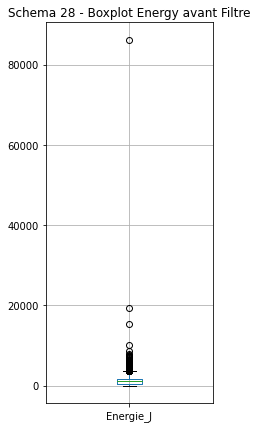

In [33]:
d_04_enr = d_04.filter(['Energie_J'], axis=1)
d_04_enr['Energie_J'] = pd.to_numeric(d_04_enr['Energie_J'])
#BoxPlot Avant
plt.figure(figsize=(3, 7))

boxplot_Energy = d_04_enr.boxplot(column=['Energie_J'])
plt.title('Schema 28 - Boxplot Energy avant Filtre')

//////////////////////
Cellules pleines :  Energie_J 0 %
//////////////////////


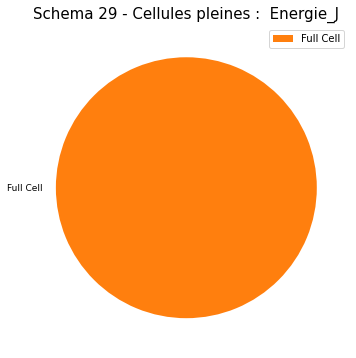

In [34]:
mEmptyCell_data = mEmptyCell(d_04_enr)
print("//////////////////////")
print('Cellules pleines :  Energie_J', mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 29 - Cellules pleines :  Energie_J'
a = mEmptyGraph(mEmptyCell_data,str)

In [35]:
#-----_Energy 1 : Drop NA -------
d_041_Energy = d_04_enr.dropna()
print("_Energy 2----", d_041_Energy.describe())
#-----_Energy 2 : Filtre 25 / 75 -------
print("_Energy 3----", d_041_Energy.shape)
d_042_Energy_filter = d_041_Energy.drop(d_041_Energy[d_041_Energy.Energie_J < 423].index)
d_043_Energy_filter = d_042_Energy_filter.drop(d_041_Energy[d_041_Energy.Energie_J >  1715].index)
d_Energy_filter = d_043_Energy_filter.sort_values(by=['Energie_J'], ascending=False)
print(" _Energy 4----", d_Energy_filter.shape)


_Energy 2----           Energie_J
count  74054.000000
mean    1157.627432
std      880.120584
min        0.000000
25%      423.000000
50%     1084.000000
75%     1715.000000
max    86200.000000
_Energy 3---- (74054, 1)
 _Energy 4---- (37142, 1)


Text(0.5, 1.0, 'Schema 30 - Boxplot Energy après Filtre')

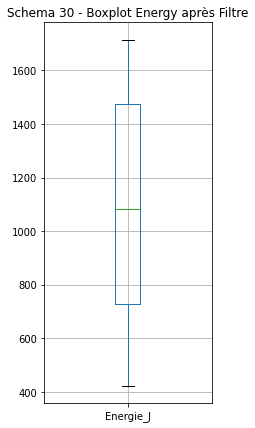

In [36]:
#BoxPlot Aprés
plt.figure(figsize=(3, 7))
boxplot_Energy = d_Energy_filter.boxplot(column=['Energie_J'])
plt.title('Schema 30 - Boxplot Energy après Filtre')

In [37]:
# ----------------------- A faire Tourner
#sns.set_theme(style="whitegrid")
#ax = sns.barplot(x=d_Energy_filter.index, y="Energy", data=d_Energy_filter)

# 6 ----- _Sodium

Text(0.5, 1.0, 'Schema 31 - Boxplot Sodium avant Filtre')

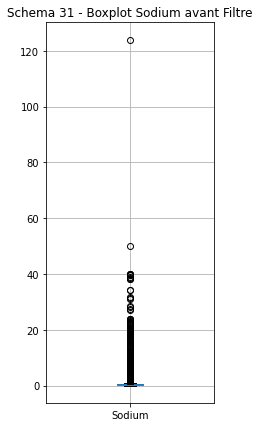

In [38]:
d_04_sodium = d_04.filter(['Sodium'], axis=1)
d_04_sodium['Sodium'] = pd.to_numeric(d_04_sodium['Sodium'])
#BoxPlot Avant
plt.figure(figsize=(3, 7))

boxplot_Soduim = d_04_sodium.boxplot(column=['Sodium'])
plt.title('Schema 31 - Boxplot Sodium avant Filtre')

//////////////////////
Cellules pleines:  Sodium 0 %
//////////////////////


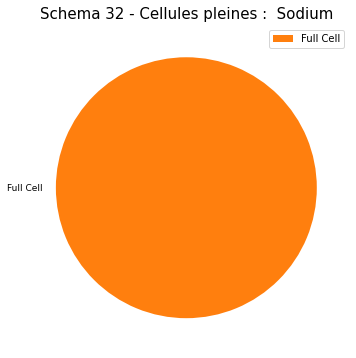

In [39]:
mEmptyCell_data = mEmptyCell(d_04_sodium)
print("//////////////////////")
print('Cellules pleines:  Sodium', mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 32 - Cellules pleines :  Sodium'
a = mEmptyGraph(mEmptyCell_data,str)

In [40]:
#-----_Sodium 1 : Drop NA -------
d_041_Sodium = d_04_sodium.dropna()
print("_Sodium 2----", d_041_Sodium.describe())
#-----_Sodium 2 : Filtre 25 / 75 -------
print("_Sodium 3----", d_041_Sodium.shape)
d_042_Sodium_filter = d_041_Sodium.drop(d_041_Sodium[d_041_Sodium.Sodium < 0.12].index)
d_043_Sodium_filter = d_042_Sodium_filter.drop(d_041_Sodium[d_041_Sodium.Sodium > 0.4].index)
d_Sodium_filter = d_043_Sodium_filter.sort_values(by=['Sodium'], ascending=False)
print(" _Sodium 4----", d_Sodium_filter.shape)


_Sodium 2----              Sodium
count  74054.000000
mean       0.346165
std        1.107828
min        0.000000
25%        0.012000
50%        0.160000
75%        0.404000
max      124.000000
_Sodium 3---- (74054, 1)
 _Sodium 4---- (21614, 1)


Text(0.5, 1.0, 'Schema 33 - Boxplot Sodium après Filtre')

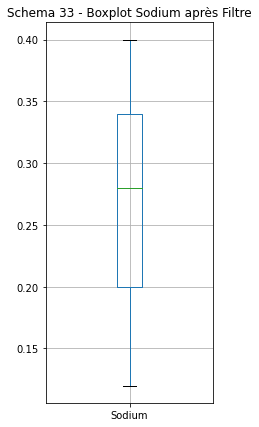

In [41]:
#BoxPlot Aprés
plt.figure(figsize=(3, 7))
boxplot_Soduim = d_Sodium_filter.boxplot(column=['Sodium'])
plt.title('Schema 33 - Boxplot Sodium après Filtre')

In [42]:
# ----------------------- A faire Tourner
#sns.set_theme(style="whitegrid")
#ax = sns.barplot(x=d_Sodium_filter.index, y="Sodium", data=d_Sodium_filter)

# 7 ----- carbohydrates_100g

Text(0.5, 1.0, 'Schema 34 - Boxplot Glucides avant Filtre')

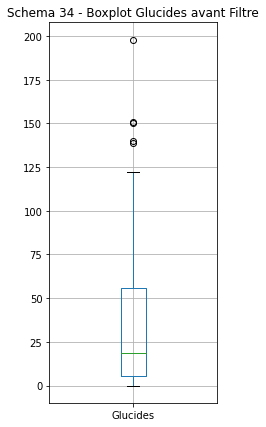

In [43]:
d_04_Carbo = d_04.filter(['Glucides'], axis=1)
d_04_Carbo['Glucides'] = pd.to_numeric(d_04_Carbo['Glucides'])
#BoxPlot Avant
plt.figure(figsize=(3, 7))

boxplot_Carbo = d_04_Carbo.boxplot(column=['Glucides'])
plt.title('Schema 34 - Boxplot Glucides avant Filtre')

//////////////////////
Cellules pleines :  Glucides 0 %
//////////////////////


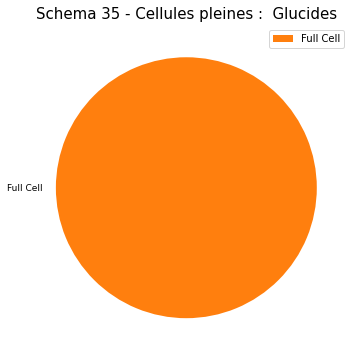

In [44]:
mEmptyCell_data = mEmptyCell(d_04_Carbo)
print("//////////////////////")
print('Cellules pleines :  Glucides', mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 35 - Cellules pleines :  Glucides'
a = mEmptyGraph(mEmptyCell_data,str)

In [45]:
#-----Carbo 1 : Drop NA -------
d_041_Carbo = d_04_Carbo.dropna()
print("Carbo 2----", d_041_Carbo.describe())
#-----Carbo 2 : Filtre 25 / 75 -------
print("Carbo 3----", d_041_Carbo.shape)
d_042_Carbo_filter = d_041_Carbo.drop(d_041_Carbo[d_041_Carbo.Glucides < 5].index)
d_043_Carbo_filter = d_042_Carbo_filter.drop(d_041_Carbo[d_041_Carbo.Glucides > 53].index)
d_Carbo_filter = d_043_Carbo_filter.sort_values(by=['Glucides'], ascending=False)
print(" _Carbo 4----", d_Carbo_filter.shape)



Carbo 2----            Glucides
count  74054.000000
mean      30.093113
std       27.226316
min        0.000000
25%        5.500000
50%       18.800000
75%       56.000000
max      198.000000
Carbo 3---- (74054, 1)
 _Carbo 4---- (36390, 1)


Text(0.5, 1.0, 'Schema 36 - Boxplot Glucides après Filtre')

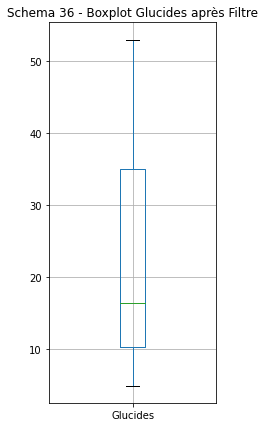

In [46]:
#BoxPlot Aprés
plt.figure(figsize=(3, 7))
boxplot_Carbo = d_Carbo_filter.boxplot(column=['Glucides'])
plt.title('Schema 36 - Boxplot Glucides après Filtre')

In [47]:
# ----------------------- A faire Tourner
#sns.set_theme(style="whitegrid")
#ax = sns.barplot(x=d_Carbo_filter.index, y="Carbo", data=d_Carbo_filter)

# 8  ----- Energy_Kcal

Text(0.5, 1.0, 'Schema 37 - Boxplot Calorie_Kcal avant Filtre')

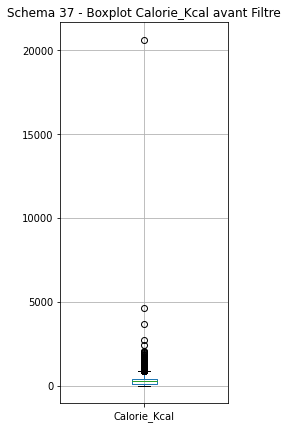

In [48]:
d_04_Energy_Kcal = d_04.filter(['Calorie_Kcal'], axis=1)
d_04_Energy_Kcal['Calorie_Kcal'] = pd.to_numeric(d_04_Energy_Kcal['Calorie_Kcal'])

#BoxPlot Avant
plt.figure(figsize=(3, 7))

boxplot_Energy_Kcal = d_04_Energy_Kcal.boxplot(column=['Calorie_Kcal'])
plt.title('Schema 37 - Boxplot Calorie_Kcal avant Filtre')

//////////////////////
Cellules pleines :  Calorie_Kcal 0 %
//////////////////////


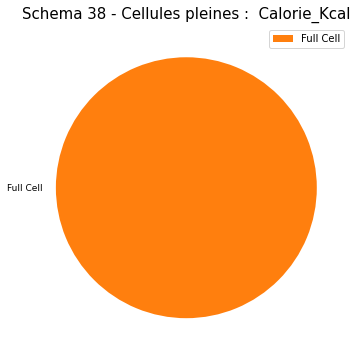

In [49]:
mEmptyCell_data = mEmptyCell(d_04_Energy_Kcal)
print("//////////////////////")
print('Cellules pleines :  Calorie_Kcal', mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 38 - Cellules pleines :  Calorie_Kcal'
a = mEmptyGraph(mEmptyCell_data,str)

In [50]:
#-----Energy_Kcal 1 : Drop NA -------
d_041_Energy_Kcal = d_04_Energy_Kcal.dropna()
print("Energy_Kcal 2----", d_041_Energy_Kcal.describe())
#-----Energy_Kcal 2 : Filtre 25 / 75 -------
print("Energy_Kcal 3----", d_041_Energy_Kcal.shape)
d_042_Energy_Kcal_filter = d_041_Energy_Kcal.drop(d_041_Energy_Kcal[d_041_Energy_Kcal.Calorie_Kcal < 101].index)
d_043_Energy_Kcal_filter = d_042_Energy_Kcal_filter.drop(d_041_Energy_Kcal[d_041_Energy_Kcal.Calorie_Kcal > 410].index)
d_Energy_Kcal_filter = d_043_Energy_Kcal_filter.sort_values(by=['Calorie_Kcal'], ascending=False)
print(" _Energy_Kcal 4----", d_Energy_Kcal_filter.shape)


Energy_Kcal 2----        Calorie_Kcal
count  74054.000000
mean     277.168517
std      211.615891
min        0.000000
25%      101.000000
50%      259.000000
75%      410.000000
max    20600.000000
Energy_Kcal 3---- (74054, 1)
 _Energy_Kcal 4---- (37155, 1)


Text(0.5, 1.0, 'Schema 39 - Boxplot Calorie_Kcal après Filtre')

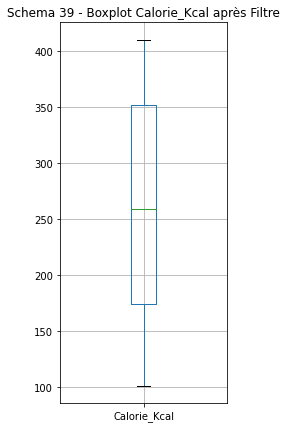

In [51]:
#BoxPlot Aprés
plt.figure(figsize=(3, 7))
boxplot_Energy_Kcal = d_Energy_Kcal_filter.boxplot(column=['Calorie_Kcal'])
plt.title('Schema 39 - Boxplot Calorie_Kcal après Filtre')

In [52]:
# ----------------------- A faire Tourner
#sns.set_theme(style="whitegrid")
#ax = sns.barplot(x=d_Energy_Kcal_filter.index, y="Energy_Kcal", data=d_Energy_Kcal_filter)

# 9 ----- salt_100g

Text(0.5, 1.0, 'Schema 40 - Boxplot Sel avant Filtre')

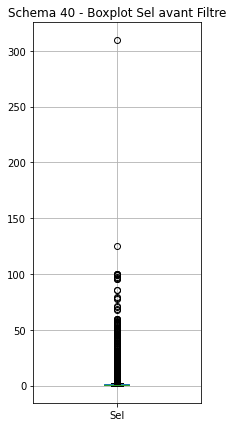

In [53]:
d_04_Salt = d_04.filter(['Sel'], axis=1)
d_04_Salt['Sel'] = pd.to_numeric(d_04_Salt['Sel'])
#BoxPlot Avant
plt.figure(figsize=(3, 7))

boxplot_Salt = d_04_Salt.boxplot(column=['Sel'])
plt.title('Schema 40 - Boxplot Sel avant Filtre')

//////////////////////
Cellules pleines :  Sel 0 %
//////////////////////


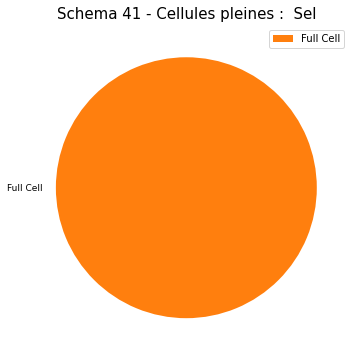

In [54]:

mEmptyCell_data = mEmptyCell(d_04_Salt)
print("//////////////////////")
print('Cellules pleines :  Sel', mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 41 - Cellules pleines :  Sel'
a = mEmptyGraph(mEmptyCell_data,str)

In [55]:

#-----Salt 1 : Drop NA -------
d_041_Salt = d_04_Salt.dropna()
print("Salt 2----", d_041_Salt.describe())
#-----Salt 2 : Filtre 25 / 75 -------
print("Salt 3----", d_041_Salt.shape)
d_042_Salt_filter = d_041_Salt.drop(d_041_Salt[d_041_Salt.Sel < 0.03].index)
d_043_Salt_filter = d_042_Salt_filter.drop(d_041_Salt[d_041_Salt.Sel > 1.01].index)
d_Salt_filter = d_043_Salt_filter.sort_values(by=['Sel'], ascending=False)
print(" _Salt 4----", d_Salt_filter.shape)


Salt 2----                 Sel
count  74054.000000
mean       0.865277
std        2.769424
min        0.000000
25%        0.030000
50%        0.400000
75%        1.010000
max      310.000000
Salt 3---- (74054, 1)
 _Salt 4---- (37685, 1)


Text(0.5, 1.0, 'Schema 42 - Boxplot Sel après Filtre')

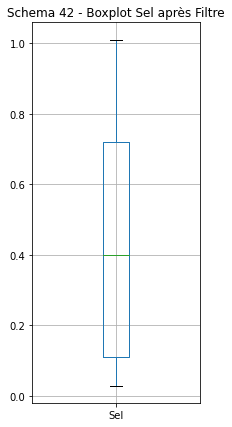

In [56]:

#BoxPlot Aprés
plt.figure(figsize=(3, 7))
boxplot_Salt = d_Salt_filter.boxplot(column=['Sel'])
plt.title('Schema 42 - Boxplot Sel après Filtre')

In [57]:
# ----------------------- A faire Tourner
# sns.set_theme(style="whitegrid")
# ax = sns.barplot(x=d_Salt_filter.index, y="Salt", data=d_Salt_filter)

# 10 ----- proteins_100g

Text(0.5, 1.0, 'Schema 43 - Boxplot Proteines avant Filtre')

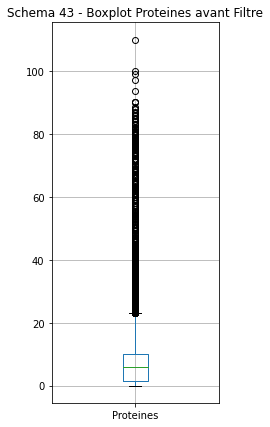

In [58]:
d_04_Proteins = d_04.filter(['Proteines'], axis=1)
d_04_Proteins['Proteines'] = pd.to_numeric(d_04_Proteins['Proteines'])
#BoxPlot Avant
plt.figure(figsize=(3, 7))

boxplot_Proteins = d_04_Proteins.boxplot(column=['Proteines'])
plt.title('Schema 43 - Boxplot Proteines avant Filtre')

//////////////////////
Cellules pleines :  Proteines 0 %
//////////////////////


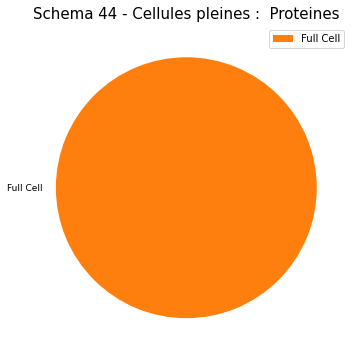

In [59]:
mEmptyCell_data = mEmptyCell(d_04_Proteins)
print("//////////////////////")
print('Cellules pleines :  Proteines', mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 44 - Cellules pleines :  Proteines'
a = mEmptyGraph(mEmptyCell_data,str)

In [60]:
#-----Proteins 1 : Drop NA -------
d_041_Proteins = d_04_Proteins.dropna()
print("Proteins 2----", d_041_Proteins.describe())
#-----Proteins 2 : Filtre 25 / 75 -------
print("Proteins 3----", d_041_Proteins.shape)
d_042_Proteins_filter = d_041_Proteins.drop(d_041_Proteins[d_041_Proteins.Proteines < 1.4].index)
d_043_Proteins_filter = d_042_Proteins_filter.drop(d_041_Proteins[d_041_Proteins.Proteines > 10].index)
d_Proteins_filter = d_043_Proteins_filter.sort_values(by=['Proteines'], ascending=False)
print(" _Proteins 4----", d_Proteins_filter.shape)



Proteins 2----           Proteines
count  74054.000000
mean       7.572117
std        8.267590
min        0.000000
25%        1.400000
50%        5.900000
75%       10.000000
max      110.000000
Proteins 3---- (74054, 1)
 _Proteins 4---- (37486, 1)


Text(0.5, 1.0, 'Schema 45 - Boxplot Proteines après Filtre')

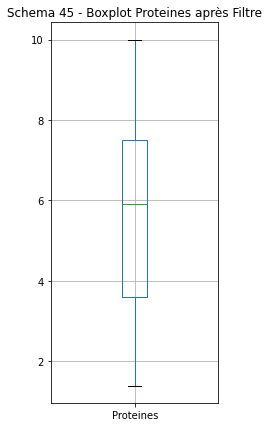

In [61]:
#BoxPlot Aprés
plt.figure(figsize=(3, 7))
boxplot_Proteins = d_Proteins_filter.boxplot(column=['Proteines'])
plt.title('Schema 45 - Boxplot Proteines après Filtre')

In [62]:
d_Proteins_filter.describe()

,Proteines
count,37486.000000
mean,5.700587
std,2.377703
min,1.400000
25%,3.600000
50%,5.900000
75%,7.500000
max,10.000000


# 10.1----- Fibre

In [63]:
d_04

,Code,Nom_du_produit,Marque,Categories,Calorie_Kcal,Energie_J,Graisses,Graisses_saturés,Glucides,Sucres,Proteines,Sel,Sodium,Score,Fibres
21,0000000001281,Tarte noix de coco,"Crous Resto',Crous","Pies,Sweet pies,Coconut pies",381,1594,22,15.5,27.3,21.9,4.6,0.1,0.04,14,4.4
31,0000000001885,Compote de poire,Crous,"Plant-based foods and beverages,Plant-based fo...",157,657,0,0,36,27,0.6,0,0,-2,3.6
66,0000000005470,BAguette bressan,Crousresto',"Plant-based foods and beverages,Plant-based fo...",160,669,2.2,0.5,25.2,0.6,9.5,0.358,0.1432,-4,1.6
384,0000005016,Pesto à La Roquette Bio Kazidomi,Kazidomi,"Groceries,Sauces,Pestos",561,2318,53.2,9.6,11.7,0.5,8.2,2.7,1.08,23,1.3
385,0000005018,Crème d'Artichaut Bio Kazidomi,Kazidomi,"Spreads,Salted spreads,Artichoke spreads",268,1104,27.4,3.9,1.8,0,1.9,2.7,1.08,11,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555145,990530101017343401,Barre bio,Good Gout,"Plant-based foods and beverages,Plant-based fo...",509,2130,32.1,2.8,37.8,29.2,14,0.1,0.04,9,6.4
1555172,990530101029435828,Bio cookies,Griesson,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit...",477,1996,20,8.4,66,33,6.6,0.6,0.24,19,3.3
1555265,9938809161503,"Jus de fruit Innocent pomme ,peche et poire",Innocent,fr:jus-de-pomme-poire,45,188,0.1,0.1,9.9,9.3,0.4,0.01,0.004,1,1.2
1555307,9950014911001,Oignons jaunes 40/60,Ferme De L'artois,"Plant-based foods and beverages,Plant-based fo...",0,0,5,5,2,0.5,32,0.2,0.08,-11,25


In [64]:
d_04_Fiber = d_04.filter(['Fibres'], axis=1)
d_04_Fiber['Fibres'] = pd.to_numeric(d_04_Fiber['Fibres'])


Text(0.5, 1.0, 'Schema 46 -Boxplot Fibres avant Filtre')

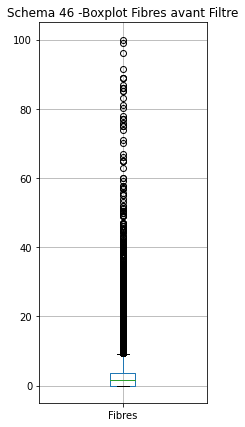

In [65]:

#BoxPlot Avant
plt.figure(figsize=(3, 7))

boxplot_Fiber = d_04_Fiber.boxplot(column=['Fibres'])
plt.title('Schema 46 -Boxplot Fibres avant Filtre')


//////////////////////
Cellules pleines :  Fibres 0 %
//////////////////////


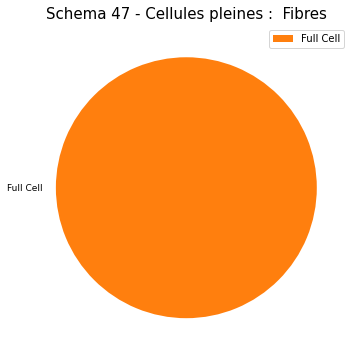

In [66]:
mEmptyCell_data = mEmptyCell(d_04_Fiber)
print("//////////////////////")
print('Cellules pleines :  Fibres', mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 47 - Cellules pleines :  Fibres'
a = mEmptyGraph(mEmptyCell_data,str)



In [67]:
#-----Fiber 1 : Drop NA -------
d_041_Fiber = d_04_Fiber.dropna()
print("Fiber 2----", d_041_Fiber.describe())
#-----Fiber 2 : Filtre 25 / 75 -------
print("Fiber 3----", d_041_Fiber.shape)
d_042_Fiber_filter = d_041_Fiber.drop(d_041_Fiber[d_041_Fiber.Fibres < 0].index)
d_043_Fiber_filter = d_042_Fiber_filter.drop(d_041_Fiber[d_041_Fiber.Fibres > 3.7].index)
d_Fiber_filter = d_043_Fiber_filter.sort_values(by=['Fibres'], ascending=False)
print(" _Fiber 4----", d_Fiber_filter.shape)



Fiber 2----              Fibres
count  74054.000000
mean       2.901959
std        4.536685
min        0.000000
25%        0.000000
50%        1.600000
75%        3.700000
max      100.000000
Fiber 3---- (74054, 1)
 _Fiber 4---- (55718, 1)


Text(0.5, 1.0, 'Schema 48 - Boxplot Fibres après Filtre')

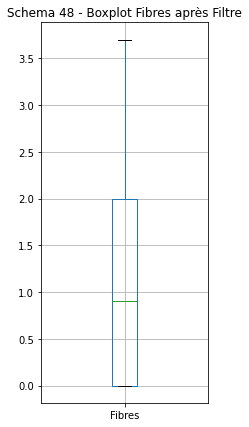

In [68]:

#BoxPlot Aprés
plt.figure(figsize=(3, 7))
boxplot_Fiber = d_Fiber_filter.boxplot(column=['Fibres'])
plt.title('Schema 48 - Boxplot Fibres après Filtre')


In [69]:
print(d_04_enr.describe())
print(d_Energy_filter.describe())

print(d_04_Score.describe())
print(d_score_filter.describe())
print(d_04_SatFat.describe())
print(d_Sat_fat_filter.describe())
print(d_04_fat.describe())
print(d_Fat_filter.describe())
print(d_04_sug.describe())
print(d_Sugar_filter.describe())
print(d_04_sodium.describe())
print(d_Sodium_filter.describe())
print(d_04_Carbo.describe())
print(d_Carbo_filter.describe())
print(d_04_Energy_Kcal.describe())
print(d_Energy_Kcal_filter.describe())
print(d_04_Salt.describe())
print(d_Salt_filter.describe())
print(d_04_Proteins.describe())
print(d_Proteins_filter.describe())
print(d_04_Fiber.describe())
print(d_Fiber_filter.describe())

          Energie_J
count  74054.000000
mean    1157.627432
std      880.120584
min        0.000000
25%      423.000000
50%     1084.000000
75%     1715.000000
max    86200.000000
          Energie_J
count  37142.000000
mean    1089.525503
std      395.177468
min      423.000000
25%      728.000000
50%     1084.000000
75%     1473.000000
max     1715.000000
              Score
count  74054.000000
mean       7.216214
std        8.819110
min      -15.000000
25%        0.000000
50%        6.000000
75%       14.000000
max       40.000000
              Score
count  40773.000000
mean       6.595849
std        4.683979
min        0.000000
25%        2.000000
50%        6.000000
75%       11.000000
max       14.000000
       Graisses_saturés
count      74054.000000
mean           4.716282
std            8.043385
min            0.000000
25%            0.200000
50%            1.500000
75%            6.000000
max          120.000000
       Graisses_saturés
count      55814.000000
mean           1

In [70]:
d_score_filter
d_Sat_fat_filter
d_Fat_filter
d_Sugar_filter
d_Energy_filter
d_Carbo_filter
d_Energy_Kcal_filter
d_Salt_filter
d_Proteins_filter
d_Fiber_filter

,Fibres
973610,3.7
1132299,3.7
621355,3.7
621089,3.7
620757,3.7
...,...
934534,0.0
934509,0.0
934508,0.0
934427,0.0


# 11----- brands

In [71]:
d_04_Brands = d_04.filter(['Marque'], axis=1)
d_04_Brands_1 = d_04_Brands['Marque'].value_counts()
d_04_Brands_2 = d_04_Brands_1.head(20)
d_04_Brands_4 = pd.DataFrame(data=d_04_Brands_2)
d_04_Brands_01 = d_04.filter(['Marque'], axis=1)
d_04_Brands_02 =  pd.Series(d_04_Brands_01['Marque'].values, index=d_04_Brands_01.index)
d_04_Brands_03 = d_04_Brands_02.dropna()
d_04_Brands_04 = d_04_Brands_03.str.split(',', expand=True)
d_04_Brands_04.drop(1, inplace=True, axis=1)
d_04_Brands_04.drop(2, inplace=True, axis=1)
d_04_Brands_04.drop(3, inplace=True, axis=1)
d_04_Brands_04.drop(4, inplace=True, axis=1)
d_04_Brands_04.drop(5, inplace=True, axis=1)
d_04_Brands_04.drop(6, inplace=True, axis=1)
d_04_Brands_05 = d_04_Brands_04.rename(columns={0: 'Marque'}) 
d_04_Brands_06 = d_04_Brands_05.drop(['Total'])
d_04_Brands_07 = d_04_Brands_06['Marque'].value_counts()
d_04_Brands_08 = pd.DataFrame(data=d_04_Brands_07)
d_04_Brands_09 = d_04_Brands_08.head(30)
d_04_Brands_10 = d_04_Brands_09.reset_index()
d_04_Brands_4 = d_04_Brands_10.rename(columns={'index': 'Marque', "Marque":'Iteration'}) 
d_04_Brands_4

,Marque,Iteration
0,U,3241
1,Auchan,2376
2,Carrefour,1731
3,Casino,1552
4,Picard,1351
5,Cora,1018
6,Leader Price,879
7,Nestlé,579
8,Thiriet,552
9,La Vie Claire,509


Text(0.5, 1.0, ' Schema 49 - Marque : Top 30')

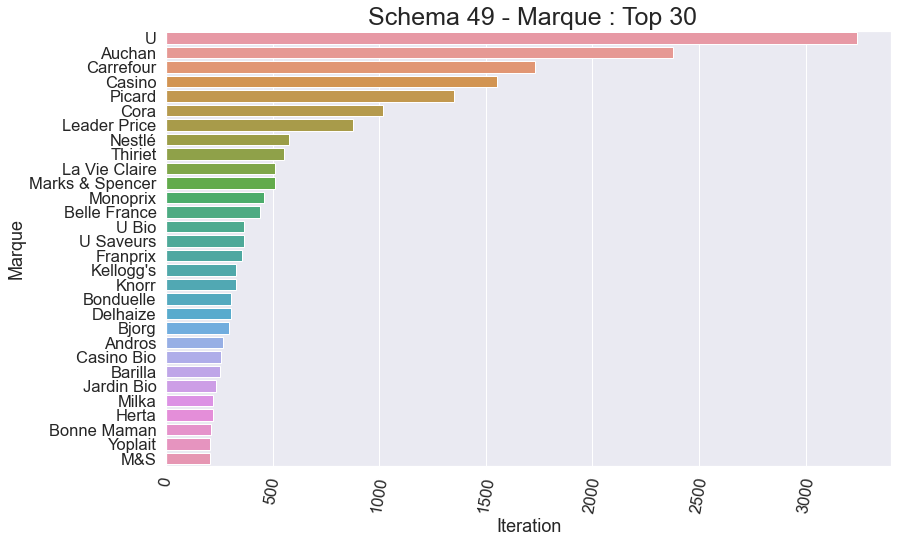

In [72]:

plt.figure(figsize=(13, 8))
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)
ax = sns.barplot(x="Iteration", y="Marque", data=d_04_Brands_4, orient='h', saturation=0.7)
plt.xticks(rotation=80)
plt.title(" Schema 49 - Marque : Top 30", fontsize=25)

//////////////////////
Cellules pleines :  Marques 0 %
//////////////////////


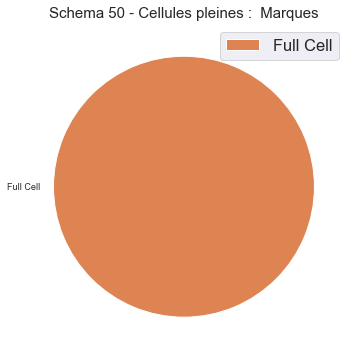

In [73]:
mEmptyCell_data = mEmptyCell(d_04_Brands)
print("//////////////////////")
print('Cellules pleines :  Marques', mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 50 - Cellules pleines :  Marques'
a = mEmptyGraph(mEmptyCell_data,str)

# 12 ----- categories

In [74]:
%store -r data

In [75]:
d_t4 = data['categories_en']
d_t5= d_t4.dropna()
d_t6 = d_t5.str.split(',', expand=True)
d_t7 = d_t6[0]
d_t8 = pd.DataFrame(data=d_t7)
d_t8.dropna()
d_t9 = d_t8.rename(columns={0: 'Categorie'}) 
d_t10 = d_t9.drop(['Total'])
d_t11 = d_t10['Categorie'].value_counts()
d_t12 = pd.DataFrame(data=d_t11)
d_t13 = d_t12.reset_index()
d_t14 = d_t13.rename(columns={'index': 'Categorie', "Categorie":'Iteration'}) 
d_t15 = d_t14.head(20)

d_t15['Categories'] = d_t15['Categorie'].replace({'Plant-based foods and beverages':'Aliments et boissons à base de plantes',
                                    'Snacks':'Snacks',
                                    'Dairies':'Laiteries', 
                                    'Meats':'Viandes', 
                                    'Meals':'Plats préparées', 
                                    'Beverages':'Breuvages', 
                                    'Groceries':' Epicerie',
                                    'Seafood':'Fruit de mer',
                                    'Desserts':'Desserts', 
                                    'Canned foods':'Aliments en conserve', 
                                    'Spreads':'Pate à tartiner', 
                                    'Frozen foods':'Plat surgelée', 
                                    'Biscuits and cakes':'Biscuits et gâteaux', 
                                    'Fish and meat and eggs':'Poisson et viande et œufs', 
                                    'Sandwiches':'Sandwichs', 
                                    'Sweeteners':'Édulcorants', 
                                    'Dietary supplements':'Compléments alimentaires', 
                                    'Baby foods':'Aliments pour bébés', 
                                    'Fats':'Graisses', 
                                    'Pies':'Tartes', }) 




d_t15.drop('Categorie', inplace=True, axis=1)


<ipython-input-75-fbda2b0666ea>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_t15['Categories'] = d_t15['Categorie'].replace({'Plant-based foods and beverages':'Aliments et boissons à base de plantes',
/Users/rogerrabbit/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0.5, 1.01, 'Schema 51 - Catégories : Top 15')

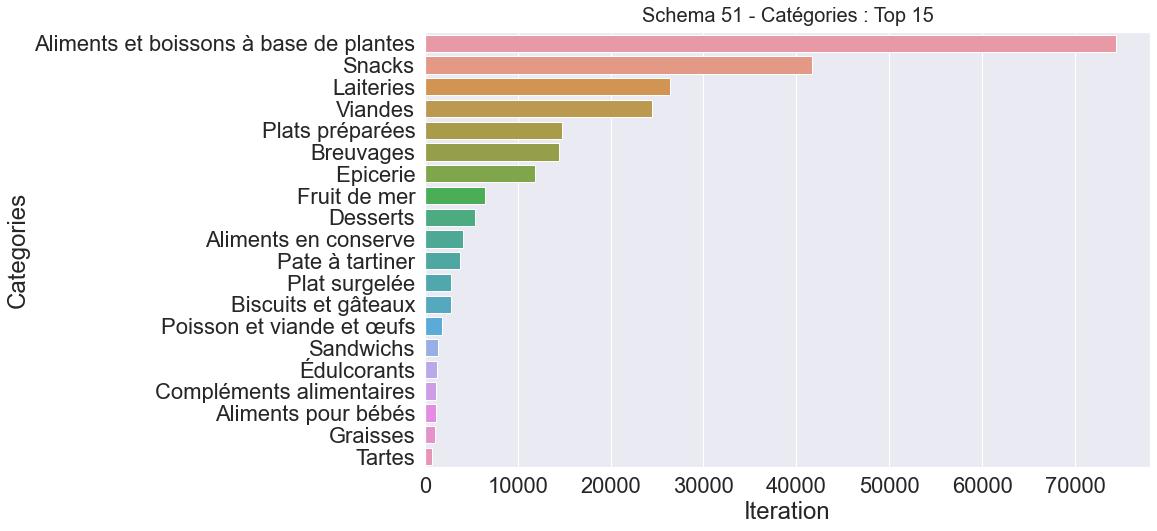

In [76]:
plt.figure(figsize=(13, 8))
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)
ax = sns.barplot(x="Iteration", y="Categories", data=d_t15, orient='h', saturation=0.7)
ax.axes.set_title("Schema 51 - Catégories : Top 15", fontsize=20, y=1.01)


//////////////////////
Cellules pleines :  Catégories 0 %
//////////////////////


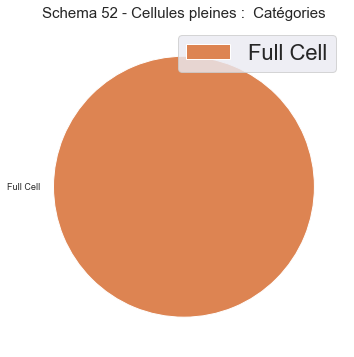

In [78]:
d_04_Cat_1 = d_04.filter(['Categories'], axis=1)
mEmptyCell_data = mEmptyCell(d_04_Cat_1)
print("//////////////////////")
print('Cellules pleines :  Catégories', mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 52 - Cellules pleines :  Catégories'
a = mEmptyGraph(mEmptyCell_data,str)

# 13 ----- product_name

In [79]:
%store -r data
d_t4 = data['product_name']
d_t5= d_t4.dropna()
d_t6 = d_t5.str.split(',', expand=True)
d_t7 = d_t6[0]
d_t8 = pd.DataFrame(data=d_t7)
d_t8.dropna()
d_t9 = d_t8.rename(columns={0: 'Nom_du_produit'}) 
d_t10 = d_t9.drop(['Total'])
d_t11 = d_t10['Nom_du_produit'].value_counts()
d_t12 = pd.DataFrame(data=d_t11)
d_t13 = d_t12.reset_index()
d_t14 = d_t13.rename(columns={'index': 'Nom_du_produit', "Nom_du_produit":'Iteration'}) 
d_t15 = d_t14.head(20)


d_t15

,Nom_du_produit,Iteration
0,Comté,477
1,Emmental,369
2,Huile d'olive vierge extra,295
3,Filet de poulet,285
4,Mayonnaise,271
5,Huile d'olive,245
6,Chocolat,230
7,Jus de pomme,227
8,Spaghetti,184
9,Saucisson sec,167


Text(0.5, 1.01, 'Schema 53 - Produit : Top 20')

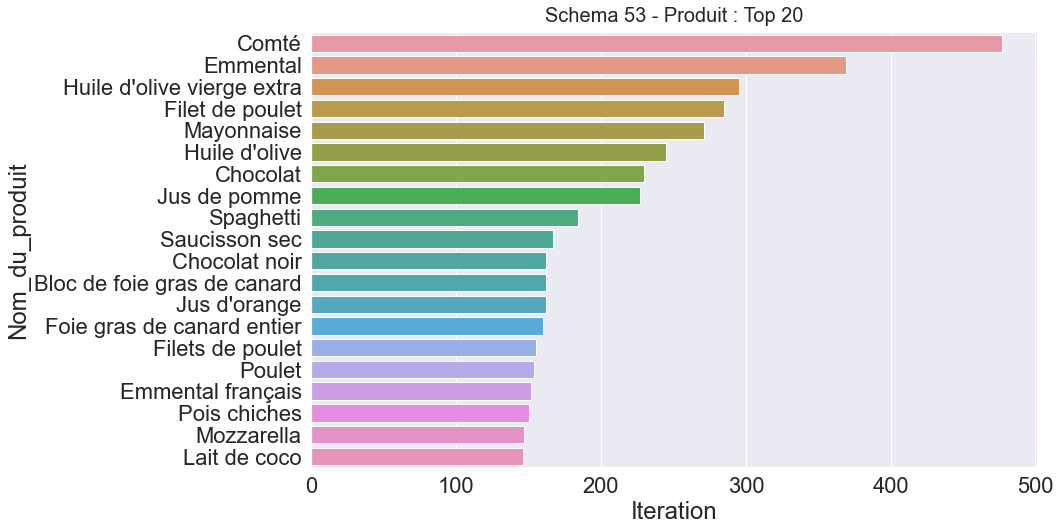

In [80]:

plt.figure(figsize=(13, 8))
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)
ax = sns.barplot(x="Iteration", y='Nom_du_produit', data=d_t15, orient='h', saturation=0.7)
ax.axes.set_title("Schema 53 - Produit : Top 20", fontsize=20, y=1.01)

# 14 ----- Code

//////////////////////
Cellules pleines :  Nom_du_produit 0 %
//////////////////////


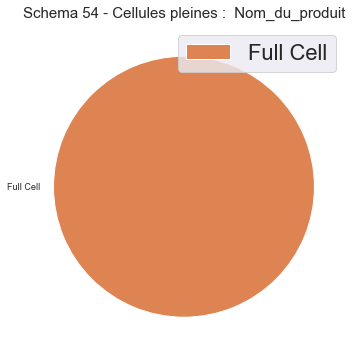

In [83]:
d_04

,Code,Nom_du_produit,Marque,Categories,Calorie_Kcal,Energie_J,Graisses,Graisses_saturés,Glucides,Sucres,Proteines,Sel,Sodium,Score,Fibres
21,0000000001281,Tarte noix de coco,"Crous Resto',Crous","Pies,Sweet pies,Coconut pies",381,1594,22,15.5,27.3,21.9,4.6,0.1,0.04,14,4.4
31,0000000001885,Compote de poire,Crous,"Plant-based foods and beverages,Plant-based fo...",157,657,0,0,36,27,0.6,0,0,-2,3.6
66,0000000005470,BAguette bressan,Crousresto',"Plant-based foods and beverages,Plant-based fo...",160,669,2.2,0.5,25.2,0.6,9.5,0.358,0.1432,-4,1.6
384,0000005016,Pesto à La Roquette Bio Kazidomi,Kazidomi,"Groceries,Sauces,Pestos",561,2318,53.2,9.6,11.7,0.5,8.2,2.7,1.08,23,1.3
385,0000005018,Crème d'Artichaut Bio Kazidomi,Kazidomi,"Spreads,Salted spreads,Artichoke spreads",268,1104,27.4,3.9,1.8,0,1.9,2.7,1.08,11,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555145,990530101017343401,Barre bio,Good Gout,"Plant-based foods and beverages,Plant-based fo...",509,2130,32.1,2.8,37.8,29.2,14,0.1,0.04,9,6.4
1555172,990530101029435828,Bio cookies,Griesson,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit...",477,1996,20,8.4,66,33,6.6,0.6,0.24,19,3.3
1555265,9938809161503,"Jus de fruit Innocent pomme ,peche et poire",Innocent,fr:jus-de-pomme-poire,45,188,0.1,0.1,9.9,9.3,0.4,0.01,0.004,1,1.2
1555307,9950014911001,Oignons jaunes 40/60,Ferme De L'artois,"Plant-based foods and beverages,Plant-based fo...",0,0,5,5,2,0.5,32,0.2,0.08,-11,25


//////////////////////
Cellules pleines :  Code 0 %
//////////////////////


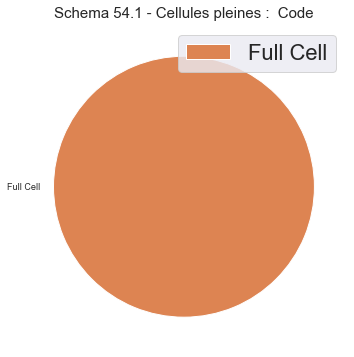

In [90]:
d_04_code = d_04["Code"]

d_04_code_1 = pd.DataFrame(data=d_04_code)

d_04_code_1

mEmptyCell_data = mEmptyCell(d_04_code_1)
print("//////////////////////")
print('Cellules pleines :  Code', mEmptyCell_data ,"%")
print("//////////////////////")
str = 'Schema 54.1 - Cellules pleines :  Code'
a = mEmptyGraph(mEmptyCell_data,str)

In [111]:
print(d_04.shape)

d_05 = d_04[:-1] #drop bottom 3 
d_05

(74054, 15)


,Code,Nom_du_produit,Marque,Categories,Calorie_Kcal,Energie_J,Graisses,Graisses_saturés,Glucides,Sucres,Proteines,Sel,Sodium,Score,Fibres
21,0000000001281,Tarte noix de coco,"Crous Resto',Crous","Pies,Sweet pies,Coconut pies",381,1594,22,15.5,27.3,21.9,4.6,0.1,0.04,14,4.4
31,0000000001885,Compote de poire,Crous,"Plant-based foods and beverages,Plant-based fo...",157,657,0,0,36,27,0.6,0,0,-2,3.6
66,0000000005470,BAguette bressan,Crousresto',"Plant-based foods and beverages,Plant-based fo...",160,669,2.2,0.5,25.2,0.6,9.5,0.358,0.1432,-4,1.6
384,0000005016,Pesto à La Roquette Bio Kazidomi,Kazidomi,"Groceries,Sauces,Pestos",561,2318,53.2,9.6,11.7,0.5,8.2,2.7,1.08,23,1.3
385,0000005018,Crème d'Artichaut Bio Kazidomi,Kazidomi,"Spreads,Salted spreads,Artichoke spreads",268,1104,27.4,3.9,1.8,0,1.9,2.7,1.08,11,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555097,990530101006696528,Deli'light fromage blanc saveur vanille 0%,Délisse,"Dairies,Desserts,Fermented foods,Fermented mil...",76,318,0,0,12,11.7,7.1,0.1,0.04,-2,0
1555145,990530101017343401,Barre bio,Good Gout,"Plant-based foods and beverages,Plant-based fo...",509,2130,32.1,2.8,37.8,29.2,14,0.1,0.04,9,6.4
1555172,990530101029435828,Bio cookies,Griesson,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit...",477,1996,20,8.4,66,33,6.6,0.6,0.24,19,3.3
1555265,9938809161503,"Jus de fruit Innocent pomme ,peche et poire",Innocent,fr:jus-de-pomme-poire,45,188,0.1,0.1,9.9,9.3,0.4,0.01,0.004,1,1.2


In [114]:
d_04.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74054 entries, 21 to Total
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Code              74054 non-null  object
 1   Nom_du_produit    74054 non-null  object
 2   Marque            74054 non-null  object
 3   Categories        74054 non-null  object
 4   Calorie_Kcal      74054 non-null  object
 5   Energie_J         74054 non-null  object
 6   Graisses          74054 non-null  object
 7   Graisses_saturés  74054 non-null  object
 8   Glucides          74054 non-null  object
 9   Sucres            74054 non-null  object
 10  Proteines         74054 non-null  object
 11  Sel               74054 non-null  object
 12  Sodium            74054 non-null  object
 13  Score             74054 non-null  object
 14  Fibres            74054 non-null  object
dtypes: object(15)
memory usage: 11.5+ MB


# SAVE DATA ====================

In [ ]:
%store d_04

In [ ]:
d_04.head(3)

In [ ]:
d_04